<a href="https://colab.research.google.com/github/francomedin/Python-Trading-Algoritmico/blob/main/Cruce_Medias_Moviles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ta

In [ ]:

import pandas as pd
import numpy as np
from ta.trend import SMAIndicator
#Matplotlib
import matplotlib.pyplot as plt
import matplotlib.style 
plt.style.use('ggplot')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ds=pd.read_csv('/content/drive/MyDrive/Datos Colab/BTC_USD Bitfinex Historical Data.csv')

In [ ]:
ds['Date']=pd.to_datetime(ds['Date'])
ds=ds.sort_values('Date')
ds=ds.set_index('Date')




In [ ]:

ds['Price']=ds['Price'].str.replace('.','')
ds['Price']=ds['Price'].str.replace(',','.')
ds['Price']=ds['Price'].astype(float)


In [ ]:
sma_short=SMAIndicator(ds['Price'],50,True)
sma_long=SMAIndicator(ds['Price'],200,True)


In [ ]:
ds['sma-short']=sma_short.sma_indicator()
ds['sma-long']=sma_long.sma_indicator()


In [ ]:
ds

,Price,Open,High,Low,Vol.,Change %,sma-short,sma-long
Date,,,,,,,,
2018-11-29,4.3129,"4,331.4","4,472.0","4,180.6",41.10K,0.15%,4.312900,4.312900
2018-11-30,4.0383,"4,323.3","4,357.4","3,966.2",42.38K,-6.37%,4.175600,4.175600
2018-12-01,4.2430,"4,043.6","4,339.0","3,978.8",27.50K,5.07%,4.198067,4.198067
2018-12-02,4.1597,"4,241.4","4,353.2","4,127.2",24.40K,-1.96%,4.188475,4.188475
2018-12-03,3.9012,"4,172.9","4,178.5","3,836.2",36.86K,-6.21%,4.131020,4.131020
...,...,...,...,...,...,...,...,...
2021-12-25,50.4370,"50,815.0","51,169.0","50,209.0",1.99K,-0.74%,55.035696,47.524771
2021-12-26,50.7970,"50,435.2","51,281.0","49,473.0",2.90K,0.71%,54.821716,47.592021
2021-12-27,50.6840,"50,797.0","52,027.0","50,483.0",3.52K,-0.22%,54.570214,47.662195


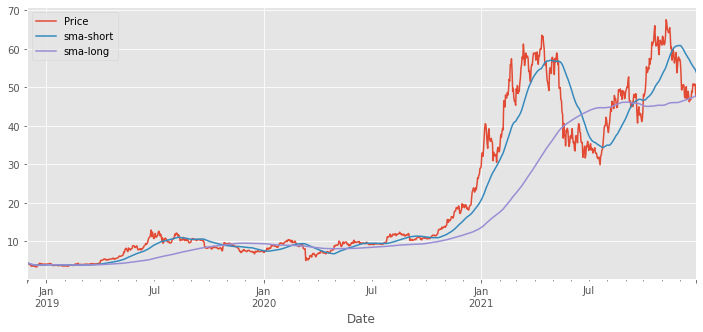

In [ ]:
ds[['Price','sma-short','sma-long']].plot(figsize=(12,5))

In [ ]:
ds['Posicion']=np.where(ds['sma-short'] > ds['sma-long'],1,-1)

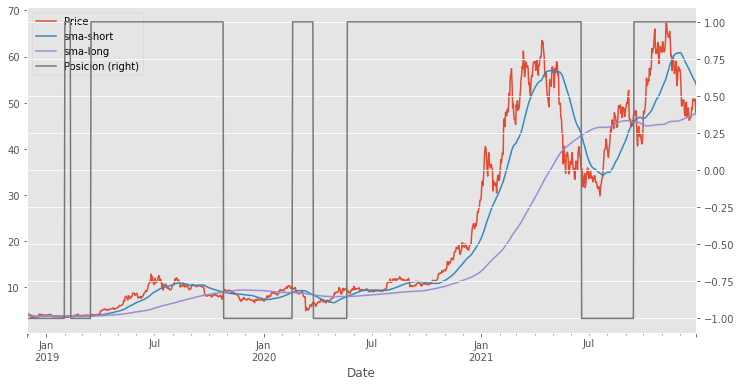

In [ ]:
ds[['Price','sma-short','sma-long','Posicion']].plot(figsize=(12,6),
                                                     secondary_y='Posicion')

## Vectorizando la estrategia

In [ ]:
ds

,Price,Open,High,Low,Vol.,Change %,sma-short,sma-long,Posicion
Date,,,,,,,,,
2018-11-29,4.3129,"4,331.4","4,472.0","4,180.6",41.10K,0.15%,4.312900,4.312900,-1
2018-11-30,4.0383,"4,323.3","4,357.4","3,966.2",42.38K,-6.37%,4.175600,4.175600,-1
2018-12-01,4.2430,"4,043.6","4,339.0","3,978.8",27.50K,5.07%,4.198067,4.198067,-1
2018-12-02,4.1597,"4,241.4","4,353.2","4,127.2",24.40K,-1.96%,4.188475,4.188475,-1
2018-12-03,3.9012,"4,172.9","4,178.5","3,836.2",36.86K,-6.21%,4.131020,4.131020,-1
...,...,...,...,...,...,...,...,...,...
2021-12-25,50.4370,"50,815.0","51,169.0","50,209.0",1.99K,-0.74%,55.035696,47.524771,1
2021-12-26,50.7970,"50,435.2","51,281.0","49,473.0",2.90K,0.71%,54.821716,47.592021,1
2021-12-27,50.6840,"50,797.0","52,027.0","50,483.0",3.52K,-0.22%,54.570214,47.662195,1


In [ ]:
ds['retornos_del_instrumento']=ds['Price'].pct_change()

In [ ]:
ds

,Price,Open,High,Low,Vol.,Change %,sma-short,sma-long,Posicion,retornos_del_instrumento
Date,,,,,,,,,,
2018-11-29,4.3129,"4,331.4","4,472.0","4,180.6",41.10K,0.15%,4.312900,4.312900,-1,NaN
2018-11-30,4.0383,"4,323.3","4,357.4","3,966.2",42.38K,-6.37%,4.175600,4.175600,-1,-0.063669
2018-12-01,4.2430,"4,043.6","4,339.0","3,978.8",27.50K,5.07%,4.198067,4.198067,-1,0.050690
2018-12-02,4.1597,"4,241.4","4,353.2","4,127.2",24.40K,-1.96%,4.188475,4.188475,-1,-0.019632
2018-12-03,3.9012,"4,172.9","4,178.5","3,836.2",36.86K,-6.21%,4.131020,4.131020,-1,-0.062144
...,...,...,...,...,...,...,...,...,...,...
2021-12-25,50.4370,"50,815.0","51,169.0","50,209.0",1.99K,-0.74%,55.035696,47.524771,1,-0.007439
2021-12-26,50.7970,"50,435.2","51,281.0","49,473.0",2.90K,0.71%,54.821716,47.592021,1,0.007138
2021-12-27,50.6840,"50,797.0","52,027.0","50,483.0",3.52K,-0.22%,54.570214,47.662195,1,-0.002225


In [ ]:
#Al estar operando con precios del dia pasado, es necesario que mueva a un dia atras la compra del activo
#Cuando tenga la señal.
ds['estrategia_retorno']=ds['Posicion'].shift(1) * ds['retornos_del_instrumento']

In [ ]:
ds.dropna(inplace=True)
ds.head()

,Price,Open,High,Low,Vol.,Change %,sma-short,sma-long,Posicion,retornos_del_instrumento,estrategia_retorno
Date,,,,,,,,,,,
2018-11-30,4.0383,"4,323.3","4,357.4","3,966.2",42.38K,-6.37%,4.175600,4.175600,-1,-0.063669,0.063669
2018-12-01,4.2430,"4,043.6","4,339.0","3,978.8",27.50K,5.07%,4.198067,4.198067,-1,0.050690,-0.050690
2018-12-02,4.1597,"4,241.4","4,353.2","4,127.2",24.40K,-1.96%,4.188475,4.188475,-1,-0.019632,0.019632
2018-12-03,3.9012,"4,172.9","4,178.5","3,836.2",36.86K,-6.21%,4.131020,4.131020,-1,-0.062144,0.062144
2018-12-04,3.9819,"3,903.8","4,131.1","3,793.1",33.69K,2.07%,4.106167,4.106167,-1,0.020686,-0.020686


In [ ]:
#np.exp= calcula el exponente de todo los elementos del array
ds['retorno_del_instrumento_acumulado']=ds['retornos_del_instrumento'].cumsum().apply(np.exp)
ds['estrategia_retorno_acumulado']=ds['estrategia_retorno'].cumsum().apply(np.exp)
ds

,Price,Open,High,Low,Vol.,Change %,sma-short,sma-long,Posicion,retornos_del_instrumento,estrategia_retorno,retorno_del_instrumento_acumulado,estrategia_retorno_acumulado
Date,,,,,,,,,,,,,
2018-11-30,4.0383,"4,323.3","4,357.4","3,966.2",42.38K,-6.37%,4.175600,4.175600,-1,-0.063669,0.063669,0.938315,1.065740
2018-12-01,4.2430,"4,043.6","4,339.0","3,978.8",27.50K,5.07%,4.198067,4.198067,-1,0.050690,-0.050690,0.987104,1.013064
2018-12-02,4.1597,"4,241.4","4,353.2","4,127.2",24.40K,-1.96%,4.188475,4.188475,-1,-0.019632,0.019632,0.967914,1.033150
2018-12-03,3.9012,"4,172.9","4,178.5","3,836.2",36.86K,-6.21%,4.131020,4.131020,-1,-0.062144,0.062144,0.909595,1.099391
2018-12-04,3.9819,"3,903.8","4,131.1","3,793.1",33.69K,2.07%,4.106167,4.106167,-1,0.020686,-0.020686,0.928607,1.076882
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-25,50.4370,"50,815.0","51,169.0","50,209.0",1.99K,-0.74%,55.035696,47.524771,1,-0.007439,-0.007439,28.552705,6.434983
2021-12-26,50.7970,"50,435.2","51,281.0","49,473.0",2.90K,0.71%,54.821716,47.592021,1,0.007138,0.007138,28.757232,6.481078
2021-12-27,50.6840,"50,797.0","52,027.0","50,483.0",3.52K,-0.22%,54.570214,47.662195,1,-0.002225,-0.002225,28.693332,6.466677


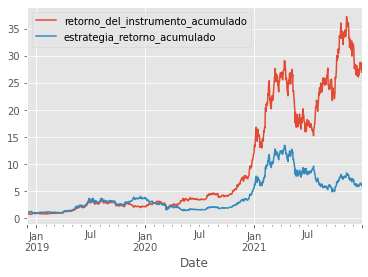

In [ ]:
ds[['retorno_del_instrumento_acumulado','estrategia_retorno_acumulado']].plot()

Vemos que la estrategia tuvo menor rendimiento que comprar y holdear.

In [ ]:
pct_superado=ds['retorno_del_instrumento_acumulado'].iloc[-1] - ds['estrategia_retorno_acumulado'].iloc[-1]

In [ ]:
pct_superado

20.965109359602152

Diferencia de 20 veces el valor


### Calculamos el CAGR de ambas estrategias

In [ ]:
anios=len(ds)/360
CAGR_estrategia= ds['estrategia_retorno_acumulado'].iloc[-1] ** (1/anios) -1
CAGR_activo=ds['retorno_del_instrumento_acumulado'].iloc[-1] ** (1/anios) -1
print('Estrategia : ' + str(CAGR_estrategia) + ' activo: ' + str(CAGR_activo))

Estrategia : 0.782683146420702 activo: 1.8705307491601046


CAGR Estrategia: 78.26%
CAGR Activo: 187%

In [ ]:
vol_estrategia=ds['retornos_del_instrumento'].std() * np.sqrt(360)
vol_activo=ds['estrategia_retorno'].std()* np.sqrt(360)

print('Volatilidad estrategia: ' + str(vol_estrategia) + ' volatilidad activo: ' + str(vol_activo))

Volatilidad estrategia: 0.7472669421272026 volatilidad activo: 0.7487123588114867


Sharpe Ratio

In [ ]:
free_risk_rate= 0.017
sharpe_ratio_estrategia= (CAGR_estrategia  - free_risk_rate)  / vol_estrategia
sharpe_ratio_activo= (CAGR_activo  - free_risk_rate)  / vol_activo

print('Sharpe_estrategia: ' + str(sharpe_ratio_estrategia) + ' sharpe_activo: ' + str(sharpe_ratio_activo) )

Sharpe_estrategia: 1.0246447464156183 sharpe_activo: 2.4756246205183756


Sortino Ratio

In [ ]:

neg_vol_activo=ds[ds['retornos_del_instrumento'] < 0 ]['retornos_del_instrumento'].std() *np.sqrt(360)
neg_vol_estrategia= ds[ds['estrategia_retorno'] < 0 ]['estrategia_retorno'].std() * np.sqrt(360)

sortino_ratio_estrategia= (CAGR_estrategia  - free_risk_rate)  / neg_vol_estrategia
sortino_ratio_activo=(CAGR_estrategia  - free_risk_rate)  / neg_vol_activo

print('Sortino_estrategia: ' + str(sharpe_ratio_estrategia) + ' Sortino_activo: ' + str(sharpe_ratio_activo))

Sortino_estrategia: 1.0246447464156183 Sortino_activo: 2.4756246205183756


Max DrawDown

In [ ]:
ds['max_ret_acum_estrategia']=ds['estrategia_retorno_acumulado'].cummax()
ds['drawdown_estrategia']=ds['max_ret_acum_estrategia'] - ds['estrategia_retorno_acumulado']
ds['drawdown_pct_estrategia']= ds['drawdown_estrategia'] / ds['max_ret_acum_estrategia']
mdd_estrategia=ds['drawdown_pct_estrategia'].max()

ds['max_ret_acum_activo']=ds['retorno_del_instrumento_acumulado'].cummax()
ds['drawdown_activo']=ds['max_ret_acum_activo'] - ds['retorno_del_instrumento_acumulado']
ds['drawdown_pct_activo']= ds['drawdown_activo'] / ds['max_ret_acum_activo']
mdd_activo=ds['drawdown_pct_activo'].max()

print('MDD_Estrategia: ' + str(mdd_estrategia) + ' MDD_Activo: ' + str(mdd_activo))


MDD_Estrategia: 0.6474214446535035 MDD_Activo: 0.5030383189798318


MDD Estrategia: 64.74% || MDD Activo: 50.3%

Calmar Ratio


In [ ]:
calmar_estrategia=CAGR_estrategia / mdd_estrategia
calmar_activo=CAGR_activo/ mdd_activo

print('Calmar_ratio_estrategia: ' + str(calmar_estrategia) + ' Calmar_ratio_activo: ' + str(calmar_activo))

Calmar_ratio_estrategia: 1.2089237279429166 Calmar_ratio_activo: 3.7184657283237694


En conclusion. Utilizar la estrategia del cruce de media moviles, no fue optima. Ya que posee mayor riesgo y menor rentabilidad.